Starting Random Forest Classification script...
Generating dataset...
Dataset saved successfully.
Training Random Forest model...
Random Forest training completed.
Evaluating model...
Model Accuracy: 0.7650


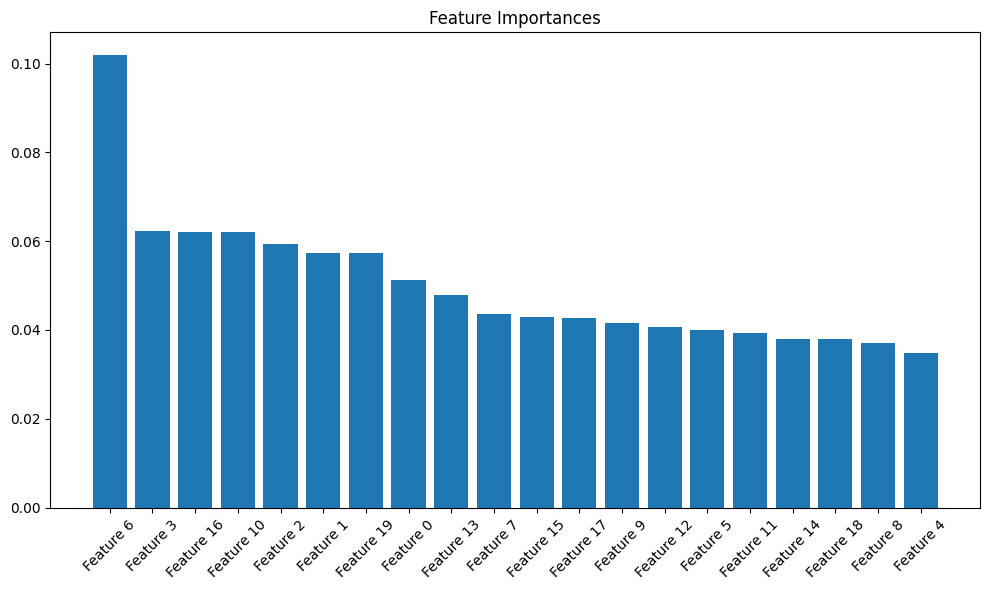

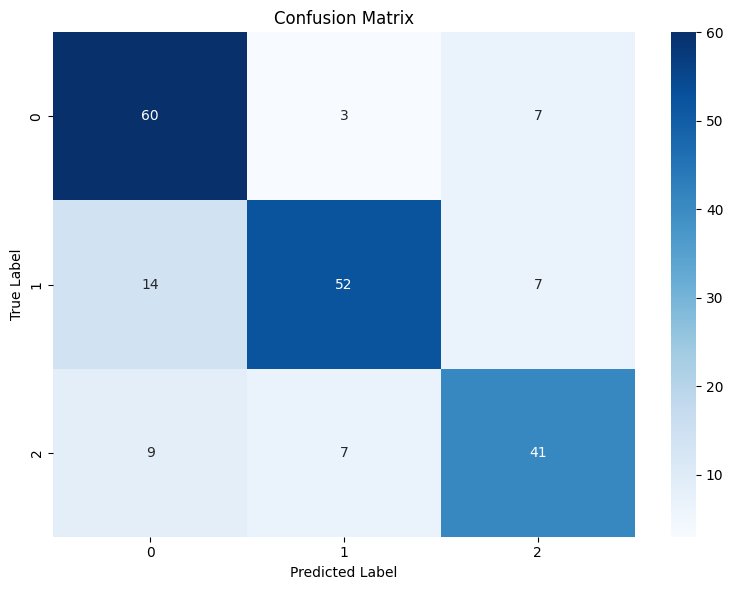

Script execution completed.


In [1]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import os

# Set up logging
log_file = "logs.txt"
logging.basicConfig(filename=log_file, level=logging.INFO, 
                    format="%(asctime)s - %(levelname)s - %(message)s", filemode="w")

def log_message(message):
    """Helper function to log and print messages."""
    print(message)  # Print to console
    logging.info(message)

def generate_data():
    """Generate and save a random n-class classification problem."""
    log_message("Generating dataset...")
    
    X, y = make_classification(
        n_samples=1000,
        n_features=20,
        n_informative=15,
        n_redundant=5,
        n_classes=3,
        random_state=42
    )
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Save dataset
    dataset_folder = "dataset"
    os.makedirs(dataset_folder, exist_ok=True)
    
    pd.DataFrame(X_train).to_csv(f"{dataset_folder}/X_train.csv", index=False)
    pd.DataFrame(X_test).to_csv(f"{dataset_folder}/X_test.csv", index=False)
    pd.DataFrame(y_train).to_csv(f"{dataset_folder}/y_train.csv", index=False)
    pd.DataFrame(y_test).to_csv(f"{dataset_folder}/y_test.csv", index=False)

    log_message("Dataset saved successfully.")
    
    return X_train, X_test, y_train, y_test

def train_random_forest(X_train, y_train, n_estimators=100):
    """Train a random forest classifier."""
    log_message("Training Random Forest model...")
    
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=None,
        min_samples_split=2,
        random_state=42
    )
    rf.fit(X_train, y_train)
    
    log_message("Random Forest training completed.")
    return rf

def evaluate_model(model, X_test, y_test):
    """Evaluate the model and return accuracy and confusion matrix."""
    log_message("Evaluating model...")
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    log_message(f"Model Accuracy: {accuracy:.4f}")
    return accuracy, conf_matrix

def plot_feature_importance(model, feature_names=None):
    """Plot feature importances."""
    importances = model.feature_importances_
    if feature_names is None:
        feature_names = [f'Feature {i}' for i in range(len(importances))]
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), 
               [feature_names[i] for i in indices], 
               rotation=45)
    plt.tight_layout()
    plt.savefig("feature_importance.png")  # Save plot
    plt.show()

def plot_confusion_matrix(conf_matrix):
    """Plot confusion matrix."""
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")  # Save plot
    plt.show()

def main():
    log_message("Starting Random Forest Classification script...")

    # Generate and split data
    X_train, X_test, y_train, y_test = generate_data()
    
    # Train model
    rf_model = train_random_forest(X_train, y_train)
    
    # Evaluate model
    accuracy, conf_matrix = evaluate_model(rf_model, X_test, y_test)
    
    # Plot results
    plot_feature_importance(rf_model)
    plot_confusion_matrix(conf_matrix)

    log_message("Script execution completed.")

if __name__ == "__main__":
    main()